# Predicting `audience_rating` Using  Machine Learning Techniques Using All Features

In [3]:
pwd

'C:\\Users\\Dalaali Gousiya'

In [2]:

pip install tensorflow

In [3]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUs Available:  0


In [6]:
pip install xgboost


   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.3/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.8/124.9 MB 2.1 MB/s eta 0:01:00
    --------------------------------------- 1.6/124.9 MB 2.7 MB/s eta 0:00:46
    --------------------------------------- 2.1/124.9 MB 2.9 MB/s eta 0:00:43
    --------------------------------------- 2.9/124.9 MB 3.1 MB/s eta 0:00:40
   - -------------------------------------- 3.9/124.9 MB 3.4 MB/s eta 0:00:37
   - -------------------------------------- 5.2/124.9 MB 3.8 MB/s eta 0:00:32
   -- ------------------------------------- 6.8/124.9 MB 4.2 MB/s eta 0:00:28
   -- ------------------------------------- 8.4/124.9 MB 4.7 MB/s eta 0:00:25
   --- ------------------------------------ 10.7/124.9 MB 5.3 MB/s eta 0:00:22
   ---- ----------------------------------- 13.4/124.9 MB 5.9 MB/s eta 0:00:19
   ----- ---------------------------------- 16.3/124.9 MB 6.6 MB/s eta 0:00

### Importing all the necessary libraries

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, cross_val_score

In [9]:
pip install xlrd

### Loading and Displaying the Rotten Tomatoes Dataset

In [29]:
rotten_tomatoes = pd.read_excel('Downloads/Rotten_Tomatoes_Movies3.xls')
rotten_tomatoes.head()

,movie_title,movie_info,critics_consensus,rating,genre,directors,writers,cast,in_theaters_date,on_streaming_date,runtime_in_minutes,studio_name,tomatometer_status,tomatometer_rating,tomatometer_count,audience_rating
0,Percy Jackson & the Olympians: The Lightning T...,A teenager discovers he's the descendant of a ...,Though it may seem like just another Harry Pot...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,Craig Titley,"Logan Lerman, Brandon T. Jackson, Alexandra Da...",2010-02-12,2010-06-29,83.0,20th Century Fox,Rotten,49,144,53.0
1,Please Give,Kate has a lot on her mind. There's the ethics...,Nicole Holofcener's newest might seem slight i...,R,Comedy,Nicole Holofcener,Nicole Holofcener,"Catherine Keener, Amanda Peet, Oliver Platt, R...",2010-04-30,2010-10-19,90.0,Sony Pictures Classics,Certified Fresh,86,140,64.0
2,10,Blake Edwards' 10 stars Dudley Moore as George...,NaN,R,"Comedy, Romance",Blake Edwards,Blake Edwards,"Dudley Moore, Bo Derek, Julie Andrews, Robert ...",1979-10-05,1997-08-27,118.0,Waner Bros.,Fresh,68,22,53.0
3,12 Angry Men (Twelve Angry Men),"A Puerto Rican youth is on trial for murder, a...",Sidney Lumet's feature debut is a superbly wri...,NR,"Classics, Drama",Sidney Lumet,Reginald Rose,"Martin Balsam, John Fiedler, Lee J. Cobb, E.G....",1957-04-13,2001-03-06,95.0,Criterion Collection,Certified Fresh,100,51,97.0
4,"20,000 Leagues Under The Sea","This 1954 Disney version of Jules Verne's 20,0...","One of Disney's finest live-action adventures,...",G,"Action & Adventure, Drama, Kids & Family",Richard Fleischer,Earl Felton,"James Mason, Kirk Douglas, Paul Lukas, Peter L...",1954-01-01,2003-05-20,127.0,Disney,Fresh,89,27,74.0


### Checking for Missing Values in the Dataset

In [12]:
rotten_tomatoes.isnull().sum()

movie_title              0
movie_info              24
critics_consensus     8329
rating                   0
genre                   17
directors              114
writers               1349
cast                   284
in_theaters_date       815
on_streaming_date        2
runtime_in_minutes     155
studio_name            416
tomatometer_status       0
tomatometer_rating       0
tomatometer_count        0
audience_rating        252
dtype: int64

### Data Cleaning

The following steps are applied to clean and preprocess the `rotten_tomatoes` dataset:

1. **Dropping Unnecessary Columns**: 
   - The `critics_consensus` column is dropped if it exists.

2. **Filling Missing Values**:
   - Missing values in the `movie_info`, `genre`, `directors`, `writers`, and `cast` columns are replaced with appropriate default values like `'No information available'`, `'Unknown'`, `'Unknown Director'`, `'Unknown Writer'`, and `'Unknown Cast'`.
   - Missing values in `in_theaters_date` and `on_streaming_date` are filled with the date `'1900-01-01'`.
   - Missing values in `runtime_in_minutes` and `audience_rating` are filled with the mean values of the respective columns.
   - Missing values in the `studio_name` column are filled with `'Unknown Studio'`.

3. **Formatting Columns**:
   - The `rating` column values are converted to uppercase.
   - The `tomatometer_status` values are capitalized.

4. **Removing Duplicates**:
   - Any duplicate rows are removed from the dataset.

5. **Saving the Cleaned Dataset**:
   - The cleaned dataset is saved as a CSV file named `rotten_tomatoes_cleaned.csv`.

In [13]:

rotten_tomatoes = rotten_tomatoes.drop(columns=['critics_consensus'], errors='ignore')

rotten_tomatoes['movie_info'] = rotten_tomatoes['movie_info'].fillna('No information available')
rotten_tomatoes['genre'] = rotten_tomatoes['genre'].fillna('Unknown')
rotten_tomatoes['directors'] = rotten_tomatoes['directors'].fillna('Unknown Director')
rotten_tomatoes['writers'] = rotten_tomatoes['writers'].fillna('Unknown Writer')
rotten_tomatoes['cast'] = rotten_tomatoes['cast'].fillna('Unknown Cast')

rotten_tomatoes['in_theaters_date'] = pd.to_datetime(rotten_tomatoes['in_theaters_date'], errors='coerce').fillna(pd.Timestamp('1900-01-01'))
rotten_tomatoes['on_streaming_date'] = pd.to_datetime(rotten_tomatoes['on_streaming_date'], errors='coerce').fillna(pd.Timestamp('1900-01-01'))

rotten_tomatoes['runtime_in_minutes'] = rotten_tomatoes['runtime_in_minutes'].fillna(rotten_tomatoes['runtime_in_minutes'].mean())
rotten_tomatoes['audience_rating'] = rotten_tomatoes['audience_rating'].fillna(rotten_tomatoes['audience_rating'].mean())

rotten_tomatoes['studio_name'] = rotten_tomatoes['studio_name'].fillna('Unknown Studio')

rotten_tomatoes['rating'] = rotten_tomatoes['rating'].str.upper()
rotten_tomatoes['tomatometer_status'] = rotten_tomatoes['tomatometer_status'].str.capitalize()

rotten_tomatoes = rotten_tomatoes.drop_duplicates()

rotten_tomatoes.to_csv('Downloads/rotten_tomatoes_cleaned.csv', index=False)

print("Dataset cleaned and saved successfully!")


Dataset cleaned and saved successfully!


### Checking for Missing Values in the Dataset after cleaning Dataset

In [2]:
Rotten_Tomatoes_Cleaned = pd.read_csv('Downloads/rotten_tomatoes_cleaned.csv')
#Rotten_Tomatoes_Cleaned.tail(10)
Rotten_Tomatoes_Cleaned.isnull().sum()

movie_title           0
movie_info            0
rating                0
genre                 0
directors             0
writers               0
cast                  0
in_theaters_date      0
on_streaming_date     0
runtime_in_minutes    0
studio_name           0
tomatometer_status    0
tomatometer_rating    0
tomatometer_count     0
audience_rating       0
dtype: int64

### Generating Summary Statistics for the Cleaned Dataset

In [15]:
Rotten_Tomatoes_Cleaned.describe()

,runtime_in_minutes,tomatometer_rating,tomatometer_count,audience_rating
count,16637.000000,16637.000000,16637.000000,16637.000000
mean,102.392359,60.464146,56.609966,60.471578
std,24.911649,28.586446,66.384769,20.307185
min,1.000000,0.000000,5.000000,0.000000
25%,90.000000,38.000000,12.000000,45.000000
50%,99.000000,66.000000,28.000000,62.000000
75%,111.000000,86.000000,76.000000,77.000000
max,2000.000000,100.000000,497.000000,100.000000


### Dataset Information

In [23]:
Rotten_Tomatoes_Cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16637 entries, 0 to 16636
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   movie_title         16637 non-null  object 
 1   movie_info          16637 non-null  object 
 2   rating              16637 non-null  object 
 3   genre               16637 non-null  object 
 4   directors           16637 non-null  object 
 5   writers             16637 non-null  object 
 6   cast                16637 non-null  object 
 7   in_theaters_date    16637 non-null  object 
 8   on_streaming_date   16637 non-null  object 
 9   runtime_in_minutes  16637 non-null  float64
 10  studio_name         16637 non-null  object 
 11  tomatometer_status  16637 non-null  object 
 12  tomatometer_rating  16637 non-null  int64  
 13  tomatometer_count   16637 non-null  int64  
 14  audience_rating     16637 non-null  float64
dtypes: float64(2), int64(2), object(11)
memory usage: 1.9

###  Displaying cleaned Rotten Tomatoes Dataset

In [15]:
Rotten_Tomatoes_Cleaned.head()

,movie_title,movie_info,rating,genre,directors,writers,cast,in_theaters_date,on_streaming_date,runtime_in_minutes,studio_name,tomatometer_status,tomatometer_rating,tomatometer_count,audience_rating
0,Percy Jackson & the Olympians: The Lightning T...,A teenager discovers he's the descendant of a ...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,Craig Titley,"Logan Lerman, Brandon T. Jackson, Alexandra Da...",2010-02-12,2010-06-29,83.0,20th Century Fox,Rotten,49,144,53.0
1,Please Give,Kate has a lot on her mind. There's the ethics...,R,Comedy,Nicole Holofcener,Nicole Holofcener,"Catherine Keener, Amanda Peet, Oliver Platt, R...",2010-04-30,2010-10-19,90.0,Sony Pictures Classics,Certified fresh,86,140,64.0
2,10,Blake Edwards' 10 stars Dudley Moore as George...,R,"Comedy, Romance",Blake Edwards,Blake Edwards,"Dudley Moore, Bo Derek, Julie Andrews, Robert ...",1979-10-05,1997-08-27,118.0,Waner Bros.,Fresh,68,22,53.0
3,12 Angry Men (Twelve Angry Men),"A Puerto Rican youth is on trial for murder, a...",NR,"Classics, Drama",Sidney Lumet,Reginald Rose,"Martin Balsam, John Fiedler, Lee J. Cobb, E.G....",1957-04-13,2001-03-06,95.0,Criterion Collection,Certified fresh,100,51,97.0
4,"20,000 Leagues Under The Sea","This 1954 Disney version of Jules Verne's 20,0...",G,"Action & Adventure, Drama, Kids & Family",Richard Fleischer,Earl Felton,"James Mason, Kirk Douglas, Paul Lukas, Peter L...",1954-01-01,2003-05-20,127.0,Disney,Fresh,89,27,74.0


### Plotting the Distribution of Audience Ratings

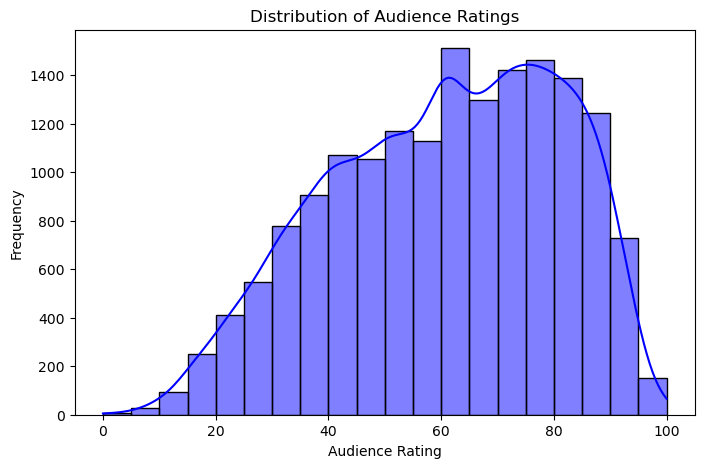

In [10]:
plt.figure(figsize=(8, 5))
sns.histplot(data=Rotten_Tomatoes_Cleaned, x='audience_rating', bins=20, kde=True, color='blue')
plt.title('Distribution of Audience Ratings')
plt.xlabel('Audience Rating')
plt.ylabel('Frequency')
plt.show()


### Scatter Plot: Audience Rating vs Tomatometer Rating

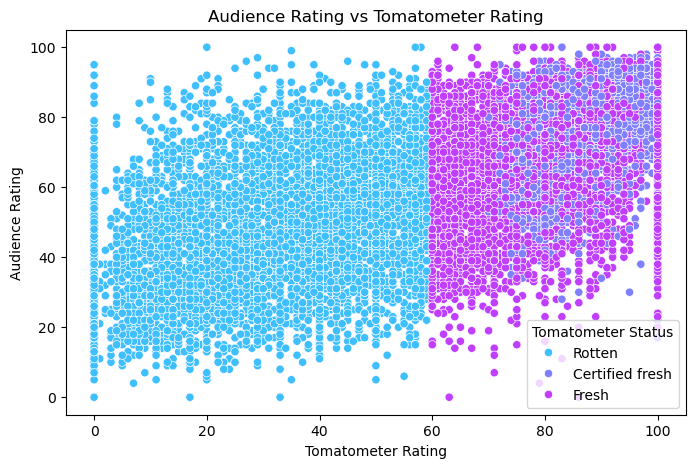

In [11]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=Rotten_Tomatoes_Cleaned, x='tomatometer_rating', y='audience_rating', hue='tomatometer_status', palette='cool')
plt.title('Audience Rating vs Tomatometer Rating')
plt.xlabel('Tomatometer Rating')
plt.ylabel('Audience Rating')
plt.legend(title='Tomatometer Status')
plt.show()


### Preparing Target Variable and Features for Machine Learning Models

In [16]:
target_column = 'audience_rating'
target = Rotten_Tomatoes_Cleaned[target_column]  
features = Rotten_Tomatoes_Cleaned.drop(columns=[target_column], errors='ignore') 


### Data Preprocessing: Scaling and Encoding


In [17]:
preprocessor = ColumnTransformer([
    ('num', MinMaxScaler(), features.select_dtypes(include=['float64', 'int64']).columns),
    ('cat', OneHotEncoder(handle_unknown='ignore'), features.select_dtypes(include='object').columns)
])

### Building and Tuning the Support Vector Regression (SVR) Model

In [19]:
from sklearn.svm import SVR

pipeline = Pipeline([
    ('preprocessor', preprocessor), 
    ('model', SVR())  
])

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

param_grid = {
    'model__kernel': ['rbf'], 
    'model__C': [1, 10],  
    'model__gamma': ['scale'],  
    'model__epsilon': [0.1]  
}

grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, verbose=1)


grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_model = grid_search.best_estimator_


y_pred = best_model.predict(X_test)

rmse = mean_squared_error(y_test, y_pred, squared=False) 
r2 = r2_score(y_test, y_pred) 

print("Best Hyperparameters:", best_params)
print("Root Mean Squared Error (RMSE):", rmse)
print("R² Score:", r2)

Fitting 5 folds for each of 2 candidates, totalling 10 fits
Best Hyperparameters: {'model__C': 1, 'model__epsilon': 0.1, 'model__gamma': 'scale', 'model__kernel': 'rbf'}
Root Mean Squared Error (RMSE): 16.43886295374153
R² Score: 0.33024079591307487


C:\Users\Dalaali Gousiya\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


### Building and Tuning the Random Forest Regressor Model

In [4]:
from sklearn.ensemble import RandomForestRegressor

pipeline = Pipeline([
    ('preprocessor', preprocessor),  
    ('model', RandomForestRegressor(random_state=42, warm_start=True))  
])


X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

param_grid = {
    'model__n_estimators': [100, 200],  
    'model__max_depth': [10, None], 
    'model__min_samples_split': [2, 5],  
    'model__min_samples_leaf': [1, 2], 
    'model__bootstrap': [True]  
}


grid_search = GridSearchCV(pipeline, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error', n_jobs=-1, verbose=1)

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

y_pred = best_model.predict(X_test)

rmse = mean_squared_error(y_test, y_pred, squared=False)  
r2 = r2_score(y_test, y_pred)  

print("Best Hyperparameters:", best_params)
print("Root Mean Squared Error (RMSE):", rmse)
print("R² Score:", r2)


Fitting 3 folds for each of 16 candidates, totalling 48 fits
Best Hyperparameters: {'model__bootstrap': True, 'model__max_depth': 10, 'model__min_samples_leaf': 2, 'model__min_samples_split': 5, 'model__n_estimators': 200}
Root Mean Squared Error (RMSE): 14.560610364831662
R² Score: 0.474546484719512


C:\Users\Dalaali Gousiya\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


### Building and Tuning the XGBoost Regressor Model

In [3]:
from xgboost import XGBRegressor

pipeline = Pipeline([
    ('preprocessor', preprocessor),  
    ('model', XGBRegressor(objective='reg:squarederror', random_state=42))  
])

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

param_grid = {
    'model__n_estimators': [100, 200],  
    'model__learning_rate': [0.01, 0.1, 0.2],  
    'model__max_depth': [3, 5, 7],  
    'model__subsample': [0.8, 1.0],
    'model__colsample_bytree': [0.8, 1.0] 
}

grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, verbose=1)

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

y_pred = best_model.predict(X_test)

rmse = mean_squared_error(y_test, y_pred, squared=False) 
r2 = r2_score(y_test, y_pred)  

print("Best Hyperparameters:", best_params)
print("Root Mean Squared Error (RMSE):", rmse)
print("R² Score:", r2)


Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best Hyperparameters: {'model__colsample_bytree': 0.8, 'model__learning_rate': 0.1, 'model__max_depth': 7, 'model__n_estimators': 200, 'model__subsample': 0.8}
Root Mean Squared Error (RMSE): 14.071044124018782
R² Score: 0.5092867433856714


C:\Users\Dalaali Gousiya\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


### Model Performance and Prediction Results

After evaluating several models, **XGBoost** emerged as the best-performing model based on the results.

These results indicate that XGBoost provided a reasonable balance between model complexity and performance, with a relatively good R² score suggesting that the model was able to explain around 51% of the variance in the audience ratings.

### Making Predictions

After training the model, I created a function to take user input for movie details, which were sourced from the dataset itself, and predict the audience rating using the trained XGBoost model. For a given movie, the predicted audience rating was **66.17**, while the actual rating from the Rotten Tomatoes dataset was **66**.

In [36]:
def get_user_input():
    print("\nEnter the details for the movie:")
    user_data = {}
    for column in features.columns:
        if features[column].dtype in ['float64', 'int64']:
            user_data[column] = float(input(f"Enter {column} (numeric): "))
        else:
            user_data[column] = input(f"Enter {column} (categorical): ")

    user_df = pd.DataFrame([user_data])
    return user_df


user_input = get_user_input()

user_prediction = best_model.predict(user_input) 

print(f"\nPredicted Audience Rating: {user_prediction[0]:.2f}")



Enter the details for the movie:


Enter movie_title (categorical):  Dark Water
Enter movie_info (categorical):  Following up on his horror smash hits Ringu and Ringu 2, Hideo Nakata directs this supernatural psychological drama about a middle aged woman struggling to cling to her sanity. Yoshimi Matsubara (Hitomi Kuroki) is the midst of a nasty divorce with her thuggish, abusive husband over the custody of their five year old daughter Ikuko (Rio Kanno). In Japan's family court system, which is heavily weighted towards the mother, Yoshimi case would normally be a piece of cake. Unfortunately, Yoshimi has a history of mental imbalance as a result of her miserable, emotionally starved childhood. The transition from housewife to independent working woman has been stressful. She has moved into a fleabag of an apartment -- completely with a constantly leaking roof -- and has had little luck finding employment. Worse, Ikuko and then Yoshimi start seeing a creepy little girl dressed in yellow suddenly appearing in apartment. W


Predicted Audience Rating: 66.17


### Actual vs Predicted Audience Ratings

To visually assess the performance of the model, I created a scatter plot comparing the actual audience ratings (`y_test`) with the predicted ratings (`y_pred`). Each point on the plot represents a pair of actual and predicted ratings for a movie.

A red dashed line is also plotted, representing the ideal scenario where the predicted ratings exactly match the actual ratings. The closer the blue points are to this line, the better the model's predictions.


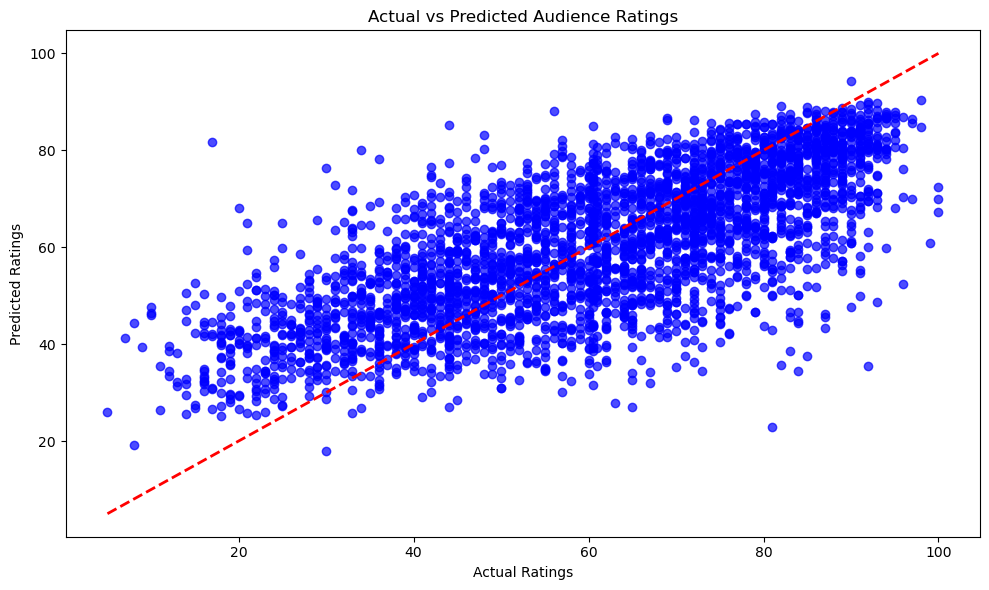

In [21]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', linewidth=2)
plt.title('Actual vs Predicted Audience Ratings')
plt.xlabel('Actual Ratings')
plt.ylabel('Predicted Ratings')
plt.tight_layout()
plt.show()


### 3D Visualization: Actual vs Predicted vs Residuals

To further evaluate the model's performance, I created a 3D scatter plot to visualize the relationship between the actual audience ratings (`y_test`), predicted ratings (`y_pred`), and residuals (the difference between actual and predicted ratings). This allows for a more comprehensive view of how well the model is predicting the ratings and where the model's errors are located.

In this plot:
- The **x-axis** represents the actual ratings.
- The **y-axis** represents the predicted ratings.
- The **z-axis** represents the residuals, or the difference between the actual and predicted ratings.

The points are colored according to the magnitude of the residuals, with a color gradient (`coolwarm`) to indicate the size of the errors. Larger residuals will have a different color compared to smaller residuals.


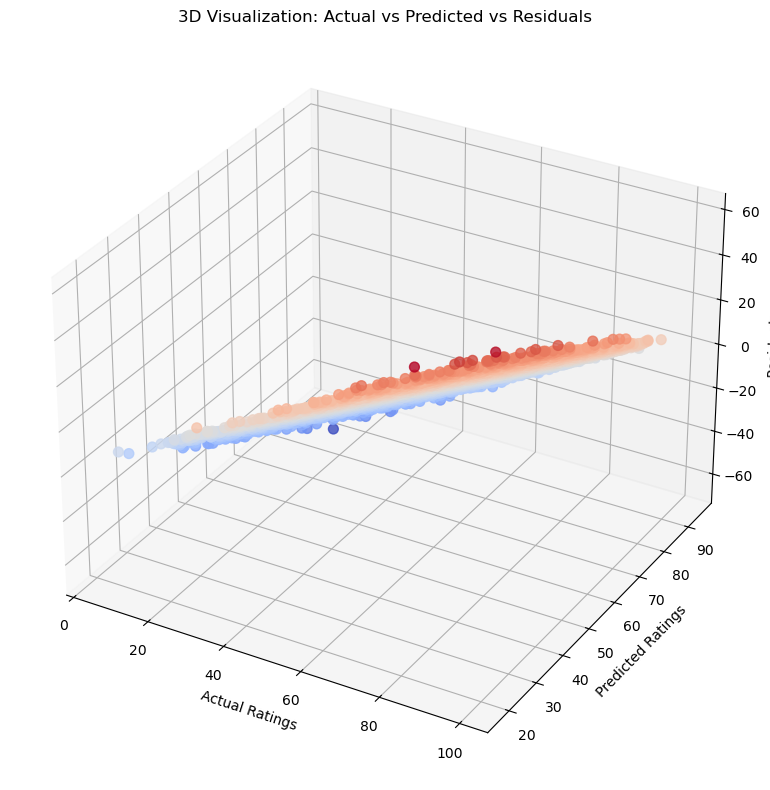

In [37]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(y_test, y_pred, residuals, c=residuals, cmap='coolwarm', s=50, alpha=0.8)
ax.set_xlabel('Actual Ratings')
ax.set_ylabel('Predicted Ratings')
ax.set_zlabel('Residuals')
ax.set_title('3D Visualization: Actual vs Predicted vs Residuals')

plt.tight_layout()
plt.show()


## Key Observations
1.  **Selecting All Features**:
   - When all features are used in the model, it performs better as it has more data to learn from.
   - Derived features like `runtime_to_rating` and `rating_to_count` are not calculated.

2.  **Selecting Only Some Features**:
   - If only a subset of features is selected for prediction, the model might not perform as well due to missing important data.
   - This is especially problematic for user input predictions because some required features might be missing, making it difficult for the user to provide all the necessary details for an accurate prediction.
   - For example, if we only ask for the **rating**, **runtime**, and **genre**, we might miss out on the **tomatometer_rating** and **tomatometer_count**, which are essential for calculating derived features like `runtime_to_rating` and `rating_to_count`.